# Stock Performance Analysis
This notebook evaluates the performance of 8 stocks recommended in a Forbes article on August 14, 2024. It analyzes individual stock metrics, visualizes stock price changes, and calculates the overall portfolio performance.


## Libraries and Setup
We use the following libraries:
- `yfinance`: For fetching stock market data.
- `matplotlib`: For visualizing stock performance.
- `pandas`: For data manipulation and analysis.


In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

## Stock Analysis Function
This function evaluates a stock based on financial metrics like:

- **Price-to-Free Cash Flow (P/FCF)**: This metric compares the company's stock price to its free cash flow per share. Free cash flow is the cash a company generates after accounting for capital expenditures, representing the funds available to reinvest or return to shareholders. A lower P/FCF ratio indicates a potentially undervalued stock.

- **Price-to-Earnings (P/E)**: The P/E ratio measures the company's stock price relative to its earnings per share (EPS). It tells you how much investors are willing to pay for each dollar of earnings. A lower P/E ratio can suggest that a stock is undervalued, but it should be compared with industry averages for better context.

- **Price-to-Book (P/B)**: This ratio compares the stock price to the company’s book value per share, which is the net asset value of the company. A P/B ratio below 1 suggests the stock is trading for less than the company's net assets, potentially indicating undervaluation.

- **Dividend Yield**: Dividend yield measures the annual dividend payout as a percentage of the stock price. It indicates the return on investment from dividends alone. A higher dividend yield is attractive to income-focused investors, but excessively high yields can sometimes signal financial instability.


It returns a recommendation ("Buy" or "Avoid") based on the following forbes thresholds:
- P/FCF < 10
- P/E < 25
- P/B < 1
- Dividen Yield > 1.3%


In [21]:
def analyze_stock(ticker):
    # Fetch data
    stock = yf.Ticker(ticker)
    info = stock.info
    cashflow = stock.cashflow
    balance_sheet = stock.balance_sheet
    
    try:
        # Extract relevant metrics
        price = info['currentPrice']
        fcf = cashflow.loc['Free Cash Flow'].iloc[0]  # Free Cash Flow
        earnings = info['trailingEps']  # Earnings per share
        shares_outstanding = info['sharesOutstanding']  # Number of shares outstanding
        book_value = balance_sheet.loc['Total Assets'].iloc[0] - balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
        dividend = info.get('dividendYield', 0)  # Dividend yield is already a percentage
        
        # Check for missing or invalid data
        if any(v is None or v <= 0 for v in [price, fcf, earnings, shares_outstanding]):
            print(f"Invalid data for {ticker}")
            return
        
        # Calculate per-share values
        fcf_per_share = fcf / shares_outstanding
        book_value_per_share = book_value / shares_outstanding
        
        # Calculate metrics
        p_fcf = price / fcf_per_share if fcf_per_share > 0 else None
        p_e = price / earnings if earnings > 0 else None
        p_b = price / book_value_per_share if book_value_per_share > 0 else None
        dividend_yield = dividend * 100  # Already a percentage, so no further adjustment

        # Evaluate based on thresholds
        metrics = {
            'P/FCF': (p_fcf, p_fcf is not None and p_fcf < 10),
            'P/E': (p_e, p_e is not None and p_e < 25),
            'P/B': (p_b, p_b is not None and p_b < 1),
            'Dividend Yield': (dividend_yield, dividend_yield is not None and dividend_yield > 1.3),
        }

        # Output result
        print(f"\nStock: {ticker}")
        for metric, (value, holds) in metrics.items():
            if value is not None:
                print(f"{metric}: {value:.2f} - {'Pass' if holds else 'Fail'}")
            else:
                print(f"{metric}: N/A - Fail")
        
        # Overall decision
        decision = 'Buy' if sum(holds for value, holds in metrics.values()) >= 2 else 'Avoid'
        print(f"Recommendation: {decision}")
        

    except Exception as e:
        print(f"Error analyzing {ticker}: {e}")


## Stock Lists
We analyze a pre-defined set of stocks and focus on those recommended by Forbes.


In [22]:
# List of 10 stocks to analyze
forbes_stocks = ['SYF', 'COF', 'EG', 'NTRS', 'BAC', 'HPE', 'USB', 'T']
# Analyze all stocks in the list
for stock in forbes_stocks:
    analyze_stock(stock)



Stock: SYF
P/FCF: 2.89 - Pass
P/E: 8.28 - Pass
P/B: 1.79 - Fail
Dividend Yield: 1.57 - Pass
Recommendation: Buy

Stock: COF
P/FCF: 3.60 - Pass
P/E: 17.49 - Pass
P/B: 1.22 - Fail
Dividend Yield: 1.30 - Fail
Recommendation: Buy

Stock: EG
P/FCF: 3.48 - Pass
P/E: 5.75 - Pass
P/B: 1.20 - Fail
Dividend Yield: 2.17 - Pass
Recommendation: Buy

Stock: NTRS
P/FCF: 10.69 - Fail
P/E: 13.10 - Pass
P/B: 1.75 - Fail
Dividend Yield: 2.85 - Pass
Recommendation: Buy

Stock: BAC
P/FCF: 7.70 - Pass
P/E: 16.35 - Pass
P/B: 1.19 - Fail
Dividend Yield: 2.30 - Pass
Recommendation: Buy

Stock: HPE
P/FCF: 17.89 - Fail
P/E: 15.63 - Pass
P/B: 1.35 - Fail
Dividend Yield: 2.36 - Pass
Recommendation: Buy

Stock: USB
P/FCF: 9.27 - Pass
P/E: 15.45 - Pass
P/B: 1.40 - Fail
Dividend Yield: 3.98 - Pass
Recommendation: Buy

Stock: T
P/FCF: 7.83 - Pass
P/E: 18.16 - Pass
P/B: 1.34 - Fail
Dividend Yield: 4.97 - Pass
Recommendation: Buy


## Stock Price Performance
We track and visualize the performance of each stock from August 14, 2024, to the present (11th november 2024).


In [23]:
# Define the start date (day of the publication) and the current date
start_date = datetime.datetime(2024, 8, 14)
end_date = datetime.datetime(2024, 11, 10)

def plot_stock_performance(ticker):
    try:
        # Fetch historical data for the stock
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)
        
        # Calculate percentage change from August 14th closing price to current price
        initial_price = hist['Close'].iloc[0]
        current_price = hist['Close'].iloc[-1]
        pct_change = ((current_price - initial_price) / initial_price) * 100

        # Plot the stock's closing price over time
        plt.figure(figsize=(10, 6))
        plt.plot(hist.index, hist['Close'], label=f"{ticker} Closing Price")
        plt.title(f"{ticker} Price Performance\n(Aug 14 to Present)\nPercentage Change: {pct_change:.2f}%")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")


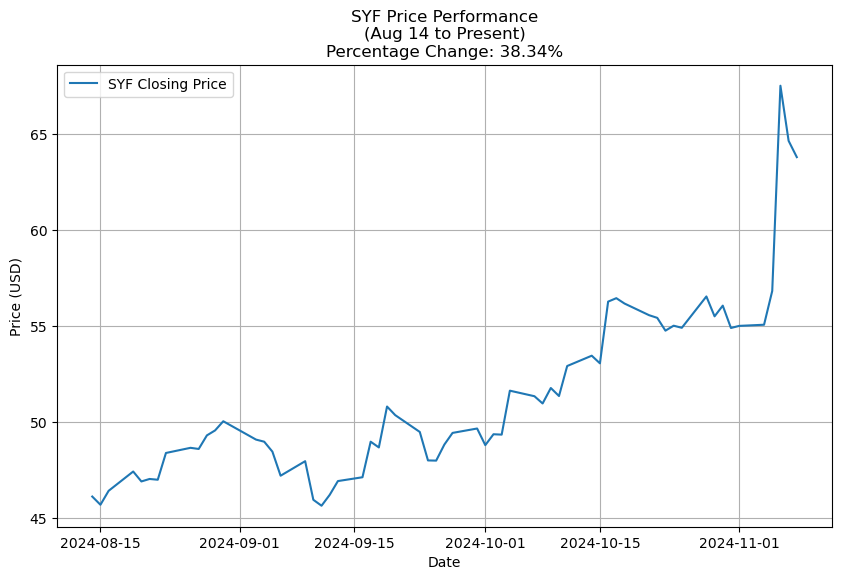

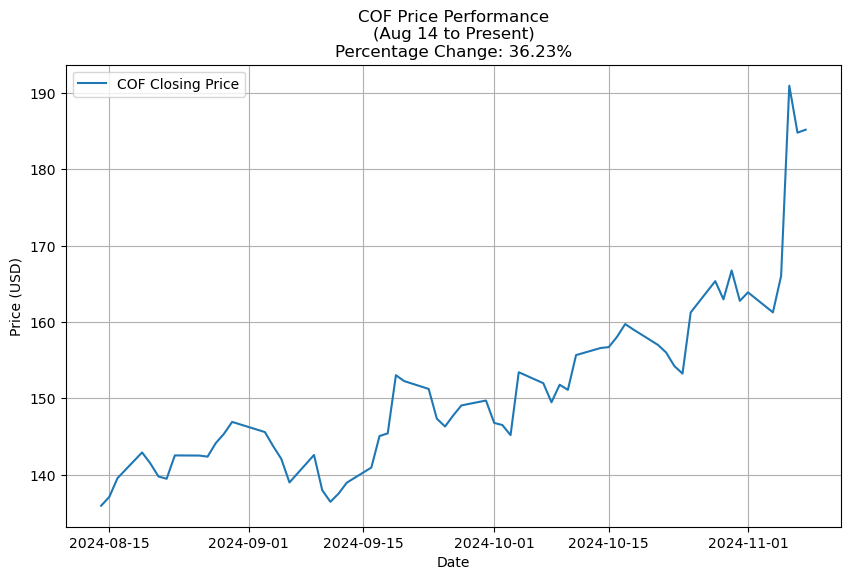

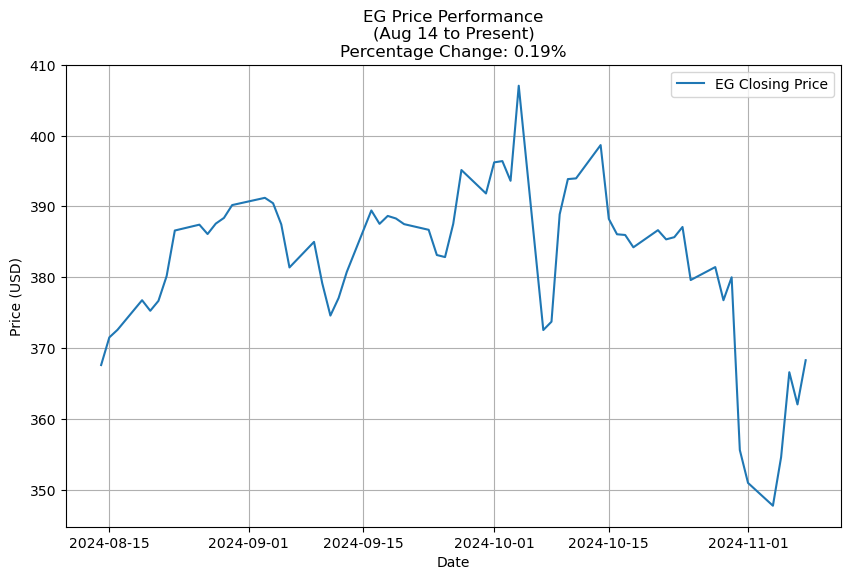

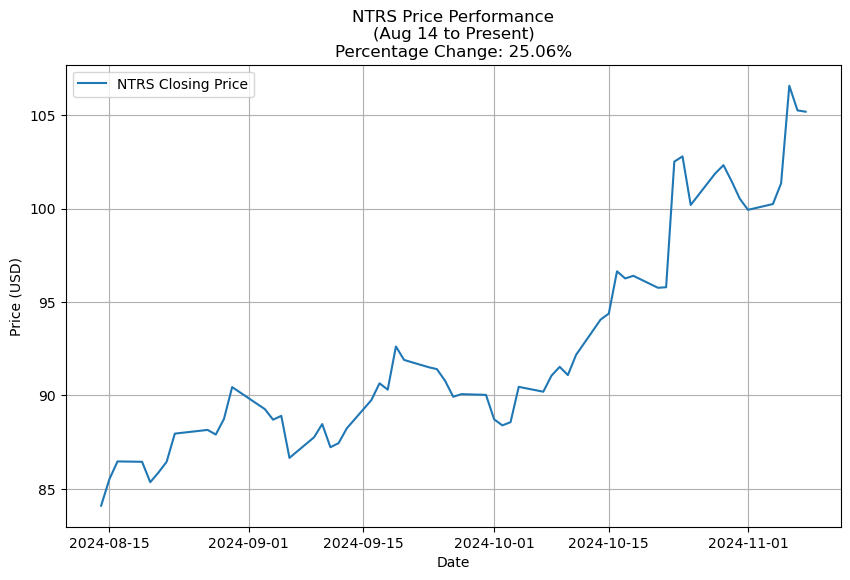

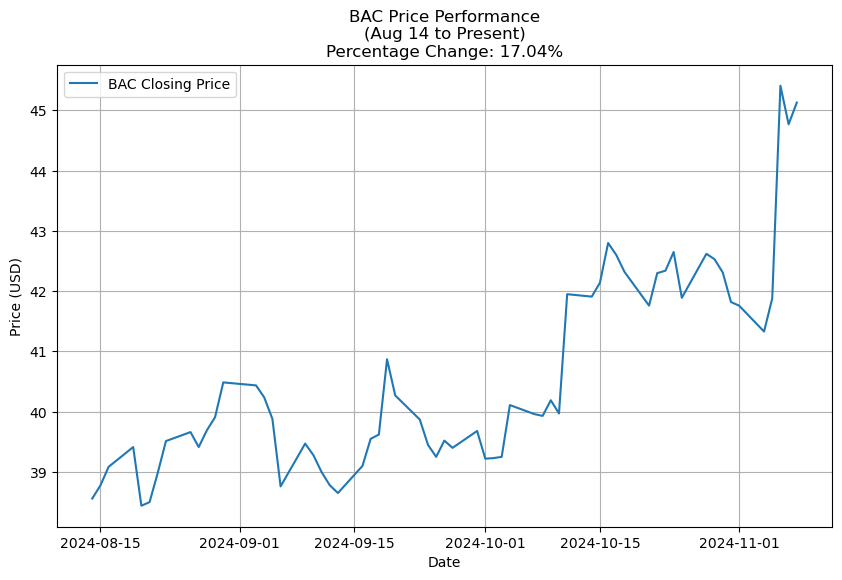

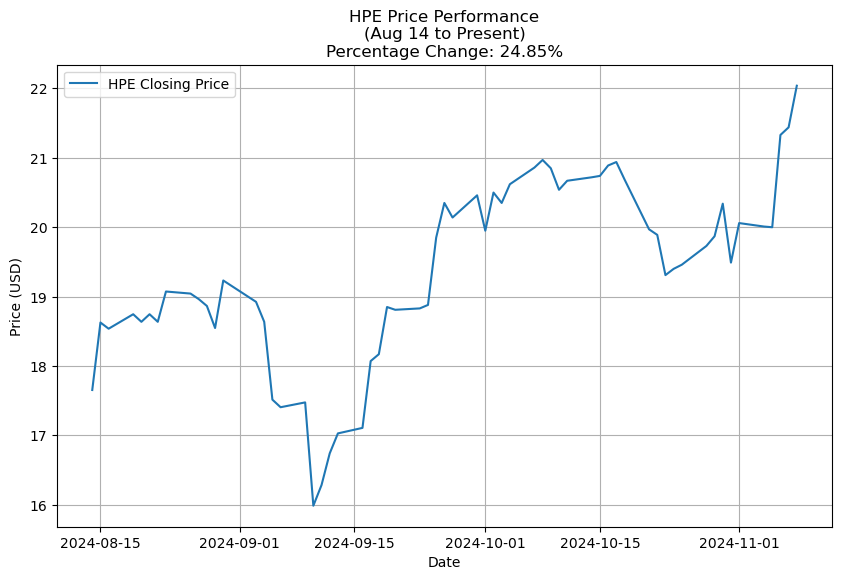

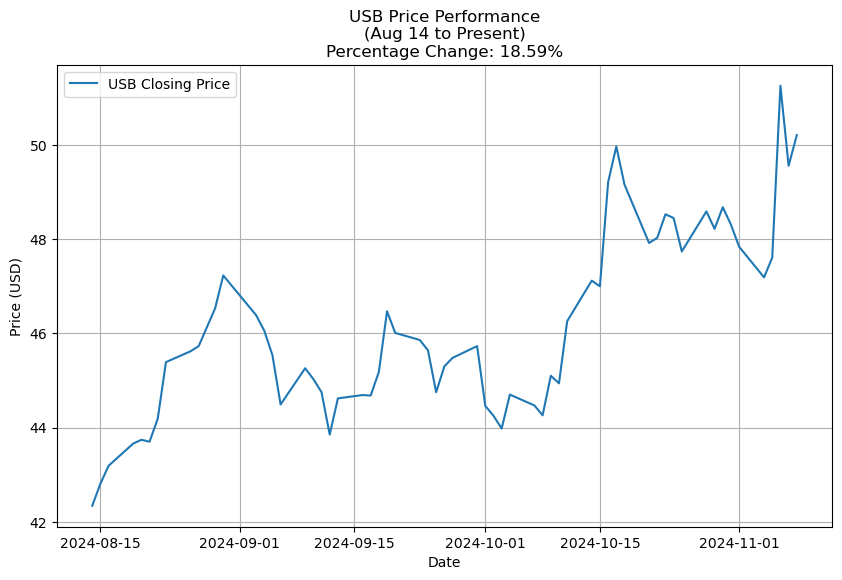

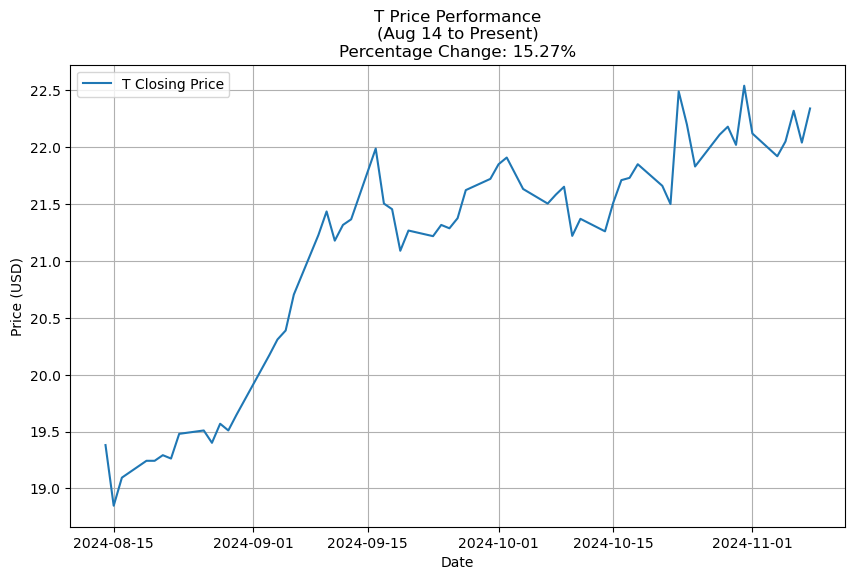

In [24]:
# Loop through each stock and plot its performance
for ticker in forbes_stocks:
    plot_stock_performance(ticker)

## Portfolio Performance
This section calculates the portfolio return, assuming equal weighting for all Forbes-recommended stocks. It also visualizes the portfolio's growth over time.


[*********************100%%**********************]  8 of 8 completed


Initial prices: 
 Ticker
BAC      38.558617
COF     135.949997
EG      367.609039
HPE      17.653694
NTRS     84.100571
SYF      46.110409
T        19.381155
USB      42.340000
Name: 2024-08-14 00:00:00, dtype: float64
Final prices: 
 Ticker
BAC      45.130001
COF     185.210007
EG      368.290009
HPE      22.040001
NTRS    105.180000
SYF      63.790001
T        22.340000
USB      50.209999
Name: 2024-11-08 00:00:00, dtype: float64

Individual Stock Performance from Aug 14, 2023 to Oct 5, 2024:

SYF: 38.34%
COF: 36.23%
EG: 0.19%
NTRS: 25.06%
BAC: 17.04%
HPE: 24.85%
USB: 18.59%
T: 15.27%

Overall Portfolio Return: 21.95%


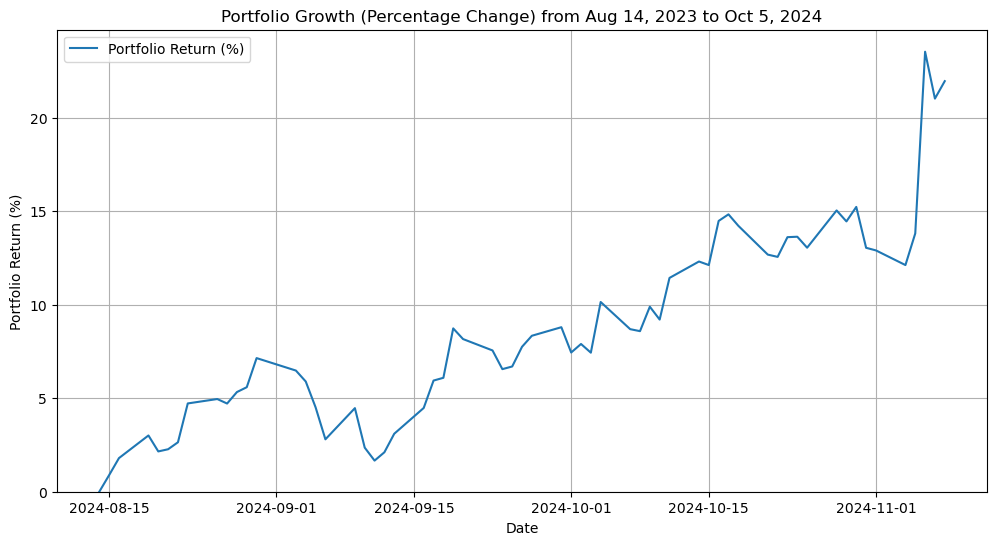

In [25]:
# List of Forbes-recommended stocks
forbes_stocks = ['SYF', 'COF', 'EG', 'NTRS', 'BAC', 'HPE', 'USB', 'T']


# Equal weight for each stock
weight = 1 / len(forbes_stocks)  # 12.5%

# Fetch historical data for all stocks
data = yf.download(forbes_stocks, start=start_date, end=end_date)['Adj Close']

# Drop any rows with missing data
data.dropna(inplace=True)

# Get the initial and final prices
initial_prices = data.iloc[0]
final_prices = data.iloc[-1]

print('Initial prices: \n', initial_prices)
print('Final prices: \n', final_prices)

# Calculate percentage change for each stock
pct_changes = ((final_prices - initial_prices) / initial_prices) * 100

# Display individual stock performance
print("\nIndividual Stock Performance from Aug 14, 2023 to Oct 5, 2024:\n")
for ticker in forbes_stocks:
    print(f"{ticker}: {pct_changes[ticker]:.2f}%")

# Calculate portfolio return
portfolio_return = (pct_changes * weight).sum()
print(f"\nOverall Portfolio Return: {portfolio_return:.2f}%")

# Calculate cumulative percentage change for the portfolio
cumulative_pct_change = ((data / initial_prices - 1) * 100).sum(axis=1) * weight

# Set up the plot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_pct_change.index, cumulative_pct_change, label='Portfolio Return (%)')
plt.title('Portfolio Growth (Percentage Change) from Aug 14, 2023 to Oct 5, 2024')
plt.xlabel('Date')
plt.ylabel('Portfolio Return (%)')
plt.ylim(0)  # Set the y-axis to start at 0%
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The analysis of Forbes' stock recommendations yielded exceptional results over the three-month period from August 14, 2024, to November 8, 2024. Here are the key findings:

1. **Outstanding Portfolio Performance**  
   - The equal-weighted portfolio delivered an **impressive overall return of +21.95% in just three months**, a remarkable gain that far exceeds typical market expectations for such a short period. This highlights the strength of Forbes' picks during this timeframe.
   


2. **Individual Stock Insights**  
   - All stocks in the portfolio reported gains, with **no losses** observed during the period. Most stocks demonstrated consistent upward trends in their price graphs, reflecting steady growth over time.  
   - The top performers, **SYF (+38.34%)** and **COF (+36.23%)**, showcased exceptional returns, while others like **NTRS (+25.06%)** and **HPE (+24.85%)** also performed strongly.  
   - Even the weakest performer, **EG (+0.19%)**, avoided losses, despite showing significant variability in its price trend. This variability stands out among the otherwise steady growth seen across the other stocks.
   
   

3. **Broader Implications**  
   - The strong overall results reinforce the importance of diversification: while some stocks like **EG** displayed volatility, their impact was balanced by the exceptional performance of others.  
   - These findings underscore that Forbes' recommendations, when viewed as a portfolio, offered incredible returns and proved highly effective over the analyzed period.

### Key Takeaway  
A 21.95% return in three months is extraordinary and highlights the potential value of expert recommendations when paired with diversification. While the results were exceptional, investors should continue to monitor individual stock variability and maintain a balanced approach to manage risks effectively.
